In [1]:
import pandas as pd
import matplotlib as plt
import re
import requests
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords 

In [2]:
# URLs for Jane Austen's "Pride and Prejudice" and "Emma"
PandP = 'https://www.gutenberg.org/files/1342/1342-h/1342-h.htm'
Emma = 'https://www.gutenberg.org/files/158/158-h/158-h.htm'

In [3]:
def word_freq(URL, exceptions = ['']):
    '''
    returns the frequency distribution of the text found at URL, with exceptions (such as names) eliminated
    
    word_freq: Str ListofStr -> (dictof Str (Nat))
    '''
    # extract text by fetching URL and creating beautiful soup
    r = requests.get(URL)
    r.encoding = 'utf-8'
    html = r.text
    soup = BeautifulSoup(html, features="lxml")
    text = soup.get_text()
    
    # create a list of the words 
    tokenizer = nltk.tokenize.RegexpTokenizer('\w+')
    tokens = tokenizer.tokenize(text)
    
    # create a list where all the words are in lowercase
    words = []
    for word in tokens:
        words.append(word.lower())
    
    # create a new list without stop words
    aux = ['would', 'could', 'may', 'might', 'must']
    titles = ['mr', 'mrs', 'miss', 'lady']
    sw = stopwords.words('english') + aux + titles + exceptions
    new_words = []
    for word in words:
        if word not in sw:
            new_words.append(word)
    
    # create and return the frequency distribution        
    freqdist = nltk.FreqDist(new_words)
    return freqdist

In [4]:
def compare_freq(URL1, URL2, exceptions = ['']):
    '''
    returns the plot of the 25 most common words in URL1 and URL2 vs word 
    frequency by calling word_freq()
    
    compare_freq: Str Str -> Plot
    '''
    # call word_freq(URL) to get the frequency distribution for each URL 
    one = word_freq(URL1, exceptions)
    two = word_freq(URL2, exceptions)
    
    # make a list containing the 25 most common in each novel
    words = []
    for x in one.most_common(25):
        words.append(x[0])
    for x in two.most_common(25):
        if x[0] not in words:
            words.append(x[0])
    
    # make a dictionary where the common words are the keys and the 
    # values are a list containing the frequency in the first and second URL
    words_dict = {}
    for w in words:
        if w in one and w in two:
            words_dict[w] = [one[w], two[w]]
        elif w in one and w not in two:
            words_dict[w] = [one[w], 0]
        elif not w in one and w in two:
            words_dict[w] = [0, two[w]]        
        else:
            words_dict[w] = [0,0] 
    
    # find the titles
    r1 = requests.get(URL1)
    r1.encoding = 'utf-8'
    html1 = r1.text
    soup1 = BeautifulSoup(html1, features="lxml")
    title1 = str(soup1.find('title'))
    
    r2 = requests.get(URL2)
    r2.encoding = 'utf-8'
    html2 = r2.text
    soup2 = BeautifulSoup(html2, features="lxml")
    title2 = str(soup2.find('title'))    
    
    # remove irrelavant info from titles
    remove = [r'<.*f ', r',.*>']
    for r in remove:
        title1 = re.sub(r, '', title1)
        title2 = re.sub(r, '', title2)
    
    # create a dataframe
    df = pd.DataFrame.from_dict(words_dict).T.reset_index()
    df.columns = ['words', title1, title2]
    
    # return bar graph
    return df.plot(kind='barh', x = 'words', color = ['salmon','cornflowerblue'], figsize=(5,12), width = 0.8)

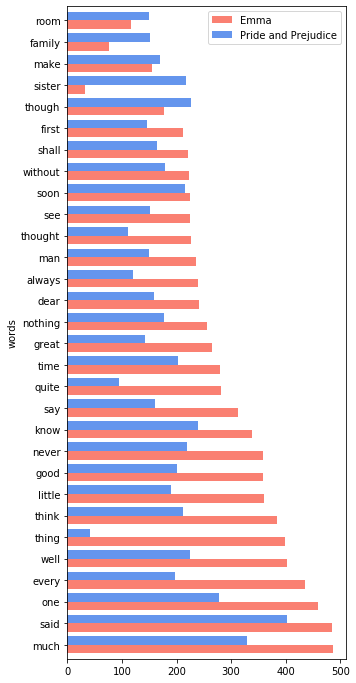

In [5]:
names = ['emma', 'harriet', 'lydia', 'elizabeth', 'weston', 'knightley', 'elton', 'woodhouse', 'jane', 'fairfax', 'darcy', 
         'bennet', 'bingley', 'wickham', 'collins', 'churchill']

compare_freq(Emma, PandP, names);

Based on this visualization, it seems like Jane Austen commonly used introspective words in her works. Words like "think" and "know" are incredibly common in both *Emma* and *Pride and Prejudice*. Additionally, family and domestic life also seem to be important in her works, with words like "family", "sister", and "room" appearing in the top 25, though sister, of course, appears more often in *Pride and Prejudice* than in *Emma*. 